Mulualem Asmare

Anderson College of Business and Computing, Regis University

MSDS696 - Data Science Practicum II

Mike Busch

May 4, 2024

# Book Recommender System Using Neural Network

## Project Objectives and Problem Definition

Currently, we live in an era where different aspects of our lives are dominated by artificial intelligence (AI). Businesses that implement AI in their decision-making processes experience improved results. One type of artificial intelligence application is recommendation systems.

The recommendation system provides personalized recommendations for users by analyzing patterns in their behavior as well as patterns in similar users. Its implication in business results in improved customer retention and engagement, which increases product sales. For instance, in 2011-2012, when Amazon first deployed its collaborative filtering-based recommender system, it recorded a 29% increase in sales by the second fiscal quarter of 2012. Today, recommendation engines are used in various sectors such as e-commerce, movie streaming services, social media services, health, and fitness, and more. The recommendation system market is predicted to increase from 2.12  billion US dollars  in 2020 to 15.3 billion US dollars by 2026.Recognizing the benefits of recommendation systems, this project aims to create a neural-based collaborative book recommendation system. The goal is to offer personalized book suggestions.The system uses a collaborative filtering-based neural network to predict how users rate books they haven't read. By understanding patterns in users' preferences and book characteristics, the system suggests highly rated books tailored to each user's tastes and experiences.


### References:
Ahramovich, A. (n.d.). Recommendation Systems and Machine Learning. Recommendation Systems and Machine Learning. https://www.itransition.com/machine-learning/recommendation-systems

## Project Details
For data analysis, we leverage Jupyter Notebook with Python 3, utilizing Google Colab to manage computational loads efficiently. Employing data understanding techniques, we comprehensively merge and analyze each dataset. Exploratory Data Analysis (EDA) offers valuable insights into the datasets. We employ various data preprocessing techniques for cleaning, handling missing values, feature engineering, and normalizing rating values.

In this study, collaborative filtering methods, employing a neural network architecture, are utilized for making recommendations. This involves identifying interactions between users and books, learning user preferences based on their ratings, and training the model to predict ratings from captured interactions. Subsequently, the trained model is utilized to generate recommendations.

Given the objective of predicting book ratings for users based on user and book ID patterns, our approach entails a regression-type model. To evaluate model performance, we employ Mean Absolute Error (MAE), considering factors such as rating distribution and outliers in the dataset. We develop three models, selecting the one with the lowest MAE for generating book recommendations for users.

## Datasets Sources
1. First dataset obtained from  https://github.com/zygmuntz/goodbooks-10k
2. Second dataset is obtained from  https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv.
3. The third dataset is collected from https://www.kaggle.com/code/mehmetcanduru/hybrid-book-recommendation-user-and-tem-based/notebook

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from keras.activations import sigmoid
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model


## Data Collection, Cleaning, and Preprocessing

The first dataset is obtained from https://github.com/zygmuntz/goodbooks-10k. From this source, we will only obtain the books.csv and rating.csv files. Since These files contain the appropriate columns for developing our recommender model.

Let's Load the files


## Load First CSV files

In [ ]:
# Used to load the first CSV file and observe the top 5 rows
good_book_books= pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
good_book_books.head()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
# Used to show dimensions of the data
good_book_books.shape

(10000, 23)

In [ ]:
# Used to show the columns of the data
good_book_books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

The dataset comprises 10,000 rows and 23 columns. As we develop a collaborative recommender system, our focus lies on three primary columns: book_id, user_id, and ratings. Additionally, we require the column containing the book titles for mapping book_ids to human-readable titles.

Upon inspection of the dataset based on the feature names, we notice the presence of two columns: original_title and title, both of which contain book names. To ascertain the most suitable column for book title mapping, further analysis is necessary.

Let's investigate

In [ ]:
# Used to form df only include book_id, orginal_title and title columns
df=good_book_books[['book_id','original_title','title']]

#Used to get the top 20 rows
df.head(20)

,book_id,original_title,title
0,1,The Hunger Games,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,Twilight,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird,To Kill a Mockingbird
4,5,The Great Gatsby,The Great Gatsby
5,6,The Fault in Our Stars,The Fault in Our Stars
6,7,The Hobbit or There and Back Again,The Hobbit
7,8,The Catcher in the Rye,The Catcher in the Rye
8,9,Angels & Demons,"Angels & Demons (Robert Langdon, #1)"
9,10,Pride and Prejudice,Pride and Prejudice


Here, we observe that the title column contains both the book title and its sequel, whereas the original title column only contains the original name. For our analysis, we will select the title of the book to map the book_id that will be recommended to the user, thereby showing the book sequel. This enhances recommendation accuracy, enabling more precise recommendations to the user.





Let's also find the unique book count and missing values for each column and investigate which column has more titles and fewer missing values. This will further solidify which column we should select.

In [ ]:
# Used to get the unique titles of books in title column
distinct_book_titles = df['title'].unique()

#Used to get the count for unique book titles in title column
distinct_book_titles_count = len(distinct_book_titles)

# Used to get the counts
distinct_book_titles_count

9964

In [ ]:
#Used to get the unique original titles of  books in orginal_title column
distinct_orgi_book_titles = df['original_title'].unique()

# Used to get the count for unique  orginal book titles
distinct_orgi_titles_count = len(distinct_orgi_book_titles)

# Used to get the original title book counts
distinct_orgi_titles_count

9275

In [ ]:
#Used to check the missing value in original_title column
df['original_title'].isnull().sum()

585

In [ ]:
#Used to check the missing value in title column
df['title'].isnull().sum()

0

The analysis reveals that the original book titles column contains fewer titles compared to the general book titles column. Furthermore, the original book title column exhibits 585 missing values. This strengthens our assertion that the "title" column incorporates both the original book titles and their sequels. Moreover, the "title" column contains more book titles compared to the original title column, which also suffers from missing values.

Based on these findings, we conclude that including the "title" column will enhance recommendation accuracy, enabling more precise recommendations to the user.

Now, let's proceed to load the second file from the same source and merge it using a common column.


In [ ]:
#Used to load the ratings dataset from the source and get the first 5 rows
good_book_ratings= pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
good_book_ratings.head()


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [ ]:
# Used to get shape of DataFrame
good_book_ratings.shape

(5976479, 3)

Here we observe that the rating dataset has 5,976,479 rows and 3 columns. The rating file obtained from the source contains three columns: user_id, book_id, and rating. Since the book_id is a common key for both the book.csv and rating.csv files, we will use this column to merge the two datasets.

Now, let's merge the datasets.

In [ ]:
# Used to merge the dataset
good_book_merged_df = pd.merge(good_book_ratings, good_book_books, on='book_id')
good_book_merged_df.head()

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...


In [ ]:
#Used to get shape of DataFrame
good_book_merged_df.shape

(5976479, 25)

The dataset comprises 597,647 rows and 25 columns. However, as we are developing a neural-based collaborative recommender system aimed at predicting ratings for books users haven't read based on their interactions with other books, our primary focus lies on three key columns: book_id, user_id, and ratings. Moreover, for enhancing human readability by mapping book_id to book titles, we also require the title of the book.

Let's proceed by selecting the columns of interest.

In [ ]:
#Used to select columns of interest
good_book=good_book_merged_df[['user_id','book_id','rating','title']]
good_book.head()

,user_id,book_id,rating,title
0,1,258,5,The Shadow of the Wind (The Cemetery of Forgot...
1,11,258,3,The Shadow of the Wind (The Cemetery of Forgot...
2,143,258,4,The Shadow of the Wind (The Cemetery of Forgot...
3,242,258,5,The Shadow of the Wind (The Cemetery of Forgot...
4,325,258,4,The Shadow of the Wind (The Cemetery of Forgot...


In [ ]:
#Used to get datatypes
good_book.dtypes

user_id     int64
book_id     int64
rating      int64
title      object
dtype: object

Here we see that the three columns needed for the development of the neural network are already in numerical data types. The "title" column is of type object. The reason we include the 'title' column is for mapping book_id to human readability but it has nothing to do with developing the model.

In [ ]:
#Used to Check Na values
good_book.isnull().sum()

user_id    0
book_id    0
rating     0
title      0
dtype: int64

Here we observe that there are no missing values in our dataset

In [ ]:
#Used to check duplicated values
good_book.duplicated().sum()

0

Here we observe that there are no duplicated rows

Let's investigate the scaling of the ratings, as understanding the scale of the ratings can enable us to assess their distribution.


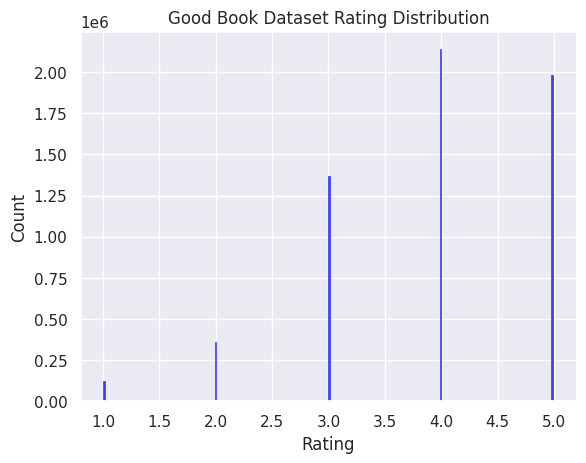

In [ ]:
#Used to graph histogram for rating
sns.histplot(good_book['rating'], color='blue')
plt.title('Good Book Dataset Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#Used to get counts of the ratings
good_book.value_counts('rating')

rating
4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: count, dtype: int64

Here we see that the distribution of the rating scale ranges from 1 to 5. Also, we can see that most books are rated 4, followed by 5, then 3. Not many books are rated on a scale of 1 and 2.



## Load Second CSV files
The second dataset has two CSV files obtained from https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv.

In [ ]:
# Used to import drive
from google.colab import drive

#Used to Mount Goodle Drive
drive.mount('/content/drive')

#Used read the csv file
amazon_Books_rating=pd.read_csv('/content/drive/My Drive/amazon_Books_rating.csv')

#Used to show the top 5 rows
amazon_Books_rating.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
#Used to show the shape
amazon_Books_rating.shape

(3000000, 10)

In [ ]:
#Used to get the columns names
amazon_Books_rating.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

So far, we have observed that the Amazon book rating dataframe contains 3,000,000 rows and 10 columns. Now, let's retrieve the second file from the same dataset source to merge and create a larger dataset.

In [ ]:
#Used to get the second file
amazon_Books=pd.read_csv('/content/drive/My Drive/amazon_books_data.csv')

#Used to show the top 5 rows
amazon_Books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
#Used to show the shape
amazon_Books.shape

(212404, 10)

In [ ]:
#Used to show the columns
amazon_Books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

Since both datasets have the column "title," we will use this column to merge the datasets.

Let's merge the datasets

In [ ]:
#Used to merge the datasets using Title column
amazon_books_merged_df = pd.merge(amazon_Books_rating, amazon_Books, on='Title')
amazon_books_merged_df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [ ]:
#Used to get the shape
amazon_books_merged_df.shape

(3000000, 19)

In [ ]:
#Used to get the shape
amazon_books_merged_df.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text',
       'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

Here we see that the datasets are  merged. Since book ID, user ID, and review/score are needed to develop the collaborative recommender system, we will select these columns. Additionally, we will select the title of the books for mapping purposes to book ID.

Let's select the columns of interest

In [ ]:
#Used to select the columns of interest
amazon_books=amazon_books_merged_df[['Id','User_id','review/score','Title']]
amazon_books.head()

,Id,User_id,review/score,Title
0,1882931173,AVCGYZL8FQQTD,4.0,Its Only Art If Its Well Hung!
1,0826414346,A30TK6U7DNS82R,5.0,Dr. Seuss: American Icon
2,0826414346,A3UH4UZ4RSVO82,5.0,Dr. Seuss: American Icon
3,0826414346,A2MVUWT453QH61,4.0,Dr. Seuss: American Icon
4,0826414346,A22X4XUPKF66MR,4.0,Dr. Seuss: American Icon


Since the column names in this dataset differ from those in the previously merged dataset, we need to rename them to ensure they are consistent for easy concatenation along the rows. Let's proceed with renaming the column names.

In [ ]:
#Used to rename the columns
amazon_books.rename(columns={'Id':'book_id','User_id':'user_id','review/score':'rating','Title':'title'}, inplace=True)
amazon_books.head()

,book_id,user_id,rating,title
0,1882931173,AVCGYZL8FQQTD,4.0,Its Only Art If Its Well Hung!
1,0826414346,A30TK6U7DNS82R,5.0,Dr. Seuss: American Icon
2,0826414346,A3UH4UZ4RSVO82,5.0,Dr. Seuss: American Icon
3,0826414346,A2MVUWT453QH61,4.0,Dr. Seuss: American Icon
4,0826414346,A22X4XUPKF66MR,4.0,Dr. Seuss: American Icon


In [ ]:
#Used to get the shape
amazon_books.shape

(3000000, 4)

Here we can observe that the names of the columns have been changed to match those of the first merged dataset for easy concatenation along rows. Also we observe that the data frame has 4 columns and 3000000 rows .

Let's check the data types in the dataset .

In [ ]:
#Used to get the data types
amazon_books.dtypes

book_id     object
user_id     object
rating     float64
title       object
dtype: object

Here we see that the datatype for book_id and user_id is Object datatype. To develop a neural network for our recommendation system, we will convert the user_id and book_id into numerical data. We will use encoding techniques later to change this.


Let's check if there are missing values

In [ ]:
#Used to check the missing values
amazon_books.isnull().sum()

book_id         0
user_id    561787
rating          0
title         208
dtype: int64

Here we observe that there are 561,787 missing user IDs in the user_id column and 208 missing book titles in the title column. Now, let's investigate the percentage of missing user IDs.


In [ ]:
# Used to Calculate the percentage of missing user_ids
user_id_missing_percentage = (amazon_books['user_id'].isna().sum() / len(amazon_books['user_id'])) * 100
print(f"Percentage of missing user IDs: {user_id_missing_percentage:.2f}%")


Percentage of missing user IDs: 18.73%


Approximately 19% of the user IDs are missing from the user_id column. Since we cannot generate user IDs, and including these missing values can result in bias in our model, we will drop the missing values from the data.


In [ ]:
#Used to drop the null values
amazon_books.dropna(inplace=True)

#Used to check the sum of the null values to verify that the NA values are dropped
amazon_books.isnull().sum()

book_id    0
user_id    0
rating     0
title      0
dtype: int64

In [ ]:
#Used to see shape of the dataset
amazon_books.shape

(2438018, 4)

The missing values have been dropped. Let's observe the scaling range of the rating.

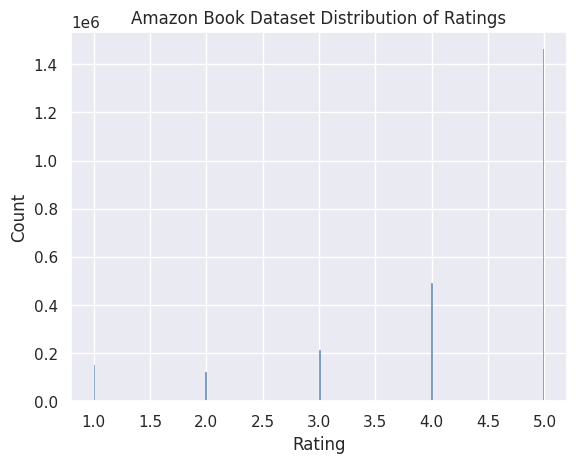

In [ ]:
#Used to show the scaling range of rating
sns.histplot(amazon_books['rating'])
plt.title('Amazon Book Dataset Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#Used to show the counts of each ratings
amazon_books.value_counts('rating')

rating
5.0    1462175
4.0     492154
3.0     212908
1.0     151152
2.0     119629
Name: count, dtype: int64

Here we see that the ratings range from 1 to 5. Additionally, we observe that there are many books rated with a score of 5.



## Load Third CSV files

The third datset is obtained form
https://www.kaggle.com/code/mehmetcanduru/hybrid-book-recommendation-user-and-tem-based/notebook



In [ ]:
#Used to load the Books _mehmt.csv
dataset3_books=pd.read_csv('/content/drive/My Drive/Books _mehmt.csv')
dataset3_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#Used to get the shape
dataset3_books.shape

(271360, 8)

In [ ]:
#Used to get the columns name
dataset3_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

Here we observe that the dataset contains 271,360 rows and 8 columns. Let's import the second dataset from the same source.

In [ ]:
# Used to load the Ratings_mehmt
dataset3_ratings = pd.read_csv('/content/drive/My Drive/Ratings_mehmt.csv')
dataset3_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#Used to get the shape
dataset3_ratings.shape

(1149780, 3)

Here we observe that the second dataset contained 1,149,780 rows and 3 columns. The dataset3_books dataframe and the dataset3_rating have a common column ISBN. We will use this column to merge the CSV files.

Let's merge the two csv files

In [ ]:
#Used to merge the two csv files on ISBN
merged_dataset3 = pd.merge(dataset3_ratings, dataset3_books, on='ISBN')
merged_dataset3.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
# Used to get shape
merged_dataset3.shape

(1031136, 10)

In [ ]:
#Used to get the columns
merged_dataset3.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

Here we can see that the datasets have been merged based on the ISBN column. To build our recommendation system, we require the following columns: 'User-ID', 'ISBN', 'Book-Rating', and 'Book-Title'. Therefore, we will drop any other columns and retain these four.

In [ ]:
#Used to drop  columns
merged_dataset3.drop(['Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)
merged_dataset3.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


Since our objective is to create a single comprehensive dataset, we must ensure that the column names match across all datasets, including the Amazon and Good Books DataFrames. This uniformity will enable us to concatenate the data along rows effectively, resulting in a unified dataset suitable for our modeling tasks. So, let's proceed to rename the columns.


In [ ]:
# Used to rename the columns
merged_dataset3.rename(columns={'User-ID':'user_id','ISBN':'book_id','Book-Rating':'rating','Book-Title':'title'}, inplace=True)
merged_dataset3.sample(10)

,user_id,book_id,rating,title
572343,105517,0802117066,0,The Zygote Chronicles
221430,76499,0679723420,10,Pale Fire: A Novel (Vintage International)
614993,192211,0449220583,0,Daughter of Deceit
1002423,229741,0520204395,8,Dangerous Pleasures: Prostitution and Modernit...
142161,11601,0380002930,0,Watership Down
17416,245320,0061000027,4,Dance Hall of the Dead (Joe Leaphorn Novels)
43773,165574,0060542128,5,When the Storm Breaks
402447,8483,3784427855,3,Die Internet- Generation. Wie wir von unseren ...
742756,50859,0802151051,5,The Homecoming
957527,252946,0099804301,0,The Queen of Springtime


The column names have been updated to their appropriate names. Now, let's examine the dataset to check its shape, data types, presence of missing values, and duplicated values.

In [ ]:
#Used to get the shape
merged_dataset3.shape

(1031136, 4)

In [ ]:
#Used to get datatypes
merged_dataset3.dtypes

user_id     int64
book_id    object
rating      int64
title      object
dtype: object

In [ ]:
#Used to get null values
merged_dataset3.isnull().sum()

user_id    0
book_id    0
rating     0
title      0
dtype: int64

In [ ]:
#Used to check duplicates
merged_dataset3.duplicated().sum()

0

We can observe that the dataset contains 1,031,136 rows and 4 columns. The 'user_id' and 'rating' columns are of type int64, while 'book_id' and 'title' are of type object. We will convert the 'book_id' column into numerical values using appropriate encoding methods for our neural network recommender later before developing the models. Furthermore, there are no missing or duplicate values in the dataset. Now, let's investigate the rating scale.

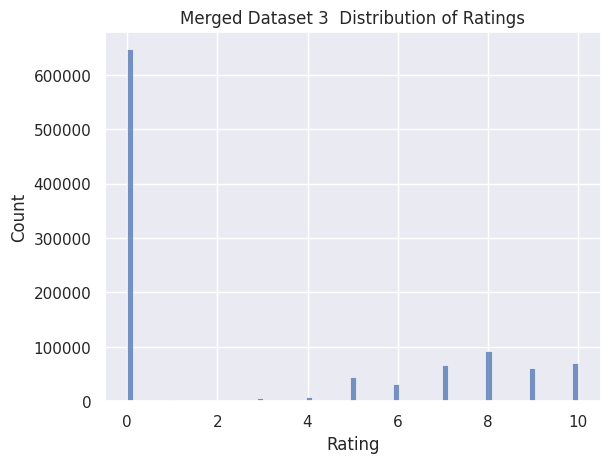

In [ ]:
#Used to show the scaling range of rating
sns.histplot(merged_dataset3['rating'])
plt.title('Merged Dataset 3  Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#Used to show the rating count of Dataset3
merged_dataset3.value_counts('rating')

rating
0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: count, dtype: int64

Here, we notice that the ratings range from 0 to 10, with a significant number of books receiving a rating of zero. Due to the disparity in rating scales between this dataset and the other two merged datasets, we need to rescale the ratings. Since my two dataframes, good_book and amazon_books, have a rating scale of 1 to 5, we must rescale the merged_dataset3 dataframe to a 1 to 5 scale.

To rescale the data and change it from 0 to 10 to 1 to 5, we approach it by multiplying each value by half. Since half of 10 is 5, dividing each value by half will give us the values of ratings on a 5 scale.

Let's do it

In [ ]:
# Used to rescale ratings for 1-10 to 1-5
merged_dataset3['rating'] = merged_dataset3['rating'] * 1/2

#Used to get the rating distribution
merged_dataset3['rating'].head()

0    0.0
1    2.5
2    0.0
3    2.5
4    4.5
Name: rating, dtype: float64

In [ ]:
#Used to show the rating count of Dataset3
merged_dataset3.value_counts('rating')

rating
0.0    647294
4.0     91804
5.0     71225
3.5     66402
4.5     60778
2.5     45355
3.0     31687
2.0      7617
1.5      5118
1.0      2375
0.5      1481
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

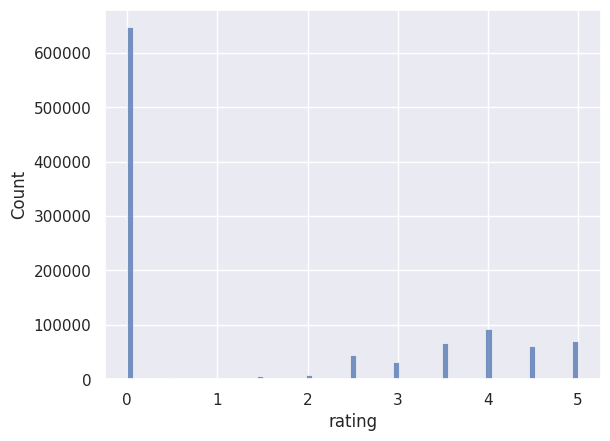

In [ ]:
#Used to show the scaling range of rating
sns.histplot(merged_dataset3['rating'])

We've noticed that the rating scale has been adjusted to range from 0 to 5. We'll be merging this dataset with the Amazon Books and Goodreads datasets, which use a scale of 1 to 5. Later on, we will normalize the data to a scale of 0 to 1. This can ensure consistency across ratings and expedite convergence in our neural network analysis.

## Dataset Unification and Exploratory Analysis
Before merging the datasets, it's crucial to examine the user_ids in both the "good book" dataset and the merged dataset3. We suspect that these datasets employ similar anonymization methods, generating random numbers for user_ids from 1 to the total number of users. We need to verify if there are any overlapping user_ids between the two datasets. Having identical user_ids representing different users can introduce bias into our models and compromise data integrity.

In [ ]:
# Used to Check if there are any identical user IDs
if good_book['user_id'].isin(merged_dataset3['user_id']).any():
    print('Yes ! Identical user ids are detected')
else:
    print('No ! Identical users are detected')


Yes ! Identical user ids are detected


We observe that there are identical users present in both datasets. Let's check some of these identical users.


In [ ]:
# Used to get some of the identical user_ids
identical_user_ids_check = good_book[good_book['user_id'].isin(merged_dataset3['user_id'])]['user_id'].unique()
identical_user_ids_check


array([  242,   362,   499, ..., 42997, 33459, 41120])

User numbers such as 242, 362, 499, 42997, 33459, and 41120 are some of the identical users in the "good_book" and "merged_dataset3" datasets. Let's check the count for the unique user_ids in both datasets.

In [ ]:
#Used to  count the unique user_ids that is present in both datasets
identical_user_ids_count = good_book[good_book['user_id'].isin(merged_dataset3['user_id'])]['user_id'].nunique()
identical_user_ids_count


17674

We've noticed that there are 17,674 unique users shared between both datasets. Now, let's analyze the unique user IDs in each dataset and determine what percentage of these values overlap. This analysis will help us formulate a plan to address the issue.


In [ ]:
#Used to get the count of unique user ids in merged_datasets
merged_unique_user_id_count= merged_dataset3['user_id'].nunique()
merged_unique_user_id_count

92106

In [ ]:
#Used to get the count of unique user ids in good_book data set
good_book_userid_count=good_book['user_id'].nunique()
good_book_userid_count


53424

In [ ]:
# Used to calculate the percentage of overlapped user IDs in the merged dataset3

overlapped_user_id_percent_merge_dataset3 = (identical_user_ids_count / merged_unique_user_id_count) * 100
overlapped_user_id_percent_merge_dataset3


19.18876077562808

In [ ]:
#Used to calculate the percentage of overlapped user IDs in good book dataset
user_id_percent_not_uniqe_to_good_book=(identical_user_ids_count/good_book_userid_count)*100
user_id_percent_not_uniqe_to_good_book

33.08250973345313

In both dataframes, there are 17,674 unique usernames, comprising 33% of 'good_book' and 19% of 'merged_dataset3'. To minimize information loss, we'll remove duplicates from 'merged_dataset3'. Since duplicates account for only 19% of this dataset, it's preferable to drop them here rather than from 'good_book', which contains 33%.

In [ ]:
# Used to filter out rows from merged_dataset3 where user_id is not in good_book
merged_dataset3 = merged_dataset3[~merged_dataset3['user_id'].isin(good_book['user_id'])]


In [ ]:
# Used to Check if there are any identical user IDs
if good_book['user_id'].isin(merged_dataset3['user_id']).any():
    print('Yes ! Identical user ids are detected')
else:
    print('No ! Identical users are detected')


No ! Identical users are detected


We've successfully filtered out the duplicated user IDs from 'merged_dataset3'.

Now, let's check for duplicates across all three datasets.

In [ ]:
# Used to Check for duplicates across all the three datasets

if (good_book['user_id'].isin(merged_dataset3['user_id']).any() and
    good_book['user_id'].isin(amazon_Books['user_id']).any()):
    print('Yes! Identical user IDs are detected in all three datasets')
else:
    print('No! Identical user  detected in all three datasets')


No! Identical user  detected in all three datasets


Since there are no identical users in the datasets, let's combine  the datasets to create a unified dataset. Since the three dataframes have similar columns we can concatinate the dataframe veritcally.

In [ ]:
# Used to concatenating the DataFrames vertically
unified_df = pd.concat([good_book,amazon_books,merged_dataset3],ignore_index=True)

# Used to get the top 5 rows
unified_df.head()


,user_id,book_id,rating,title
0,1,258,5.0,The Shadow of the Wind (The Cemetery of Forgot...
1,11,258,3.0,The Shadow of the Wind (The Cemetery of Forgot...
2,143,258,4.0,The Shadow of the Wind (The Cemetery of Forgot...
3,242,258,5.0,The Shadow of the Wind (The Cemetery of Forgot...
4,325,258,4.0,The Shadow of the Wind (The Cemetery of Forgot...


Let's check the datatype of the variables. Knowing the datatype of the variable can allow us to prepare the data in the correct format for our model building and better manipulation of the data.

In [ ]:
#Used to get the datatypes
unified_df.dtypes

user_id     object
book_id     object
rating     float64
title       object
dtype: object

We noticed that 'user_id', 'book_id', and 'title' have object data types, while 'rating' is a float. Before developing our model, which relies on a neural network based on matrix factorization, we need to convert 'user_id' and 'book_id' into numerical forms. We'll handle this later in the process. For now, based on our experience, we find string data types easier to work with than object data types because objects can contain a mix of data types. To ensure smoother operations, we'll convert them into strings.

Let's do this.

In [ ]:
# Used to cnvert user_id and book_id into strings datatype
unified_df['user_id'] = unified_df['user_id'].astype(str)
unified_df['book_id'] = unified_df['book_id'].astype(str)


In [ ]:
#Used to get the dimensions of the DataFrame
unified_df.shape

(9246872, 4)

Here we observed that the data is concatenated and has 9,445,633 rows and 4 columns. Let's check if there are duplicated rows since having duplicated rows can lead to biased models and increase computational load.



In [ ]:
#Used to get the count of duplicated values
unified_df.duplicated().sum()

37540

Here, we observe that there are 37,540 duplicates. Let's drop the duplicates.

In [ ]:
# Used to drop the duplicates in the dataset
unified_df.drop_duplicates(inplace=True)

In [ ]:
# Used to check the dimensions of the DataFrame and observe if the duplicates are dropped
unified_df.shape

(9209332, 4)

In [ ]:
#Used to get the count of duplicated values
unified_df.duplicated().sum()

0

Now we observed that the duplicates are dropped in the dataset. Now let's check if there are missing values. Since having missing values in our dataset can lead to biased models.

In [ ]:
#Used to check the missing values
unified_df.isnull().sum()

user_id    0
book_id    0
rating     0
title      0
dtype: int64

No missing values are observed. Now, let's conduct further Exploratory Data Analysis (EDA) on the data. However, before we proceed, let's subset the data to 400,000 entries to reduce the computational load.

In [ ]:
# Used to subset the concatinated data selected 400000 to reduce the computitinal Load
unified_subset_data = unified_df.sample(n=400000, random_state=42)
unified_subset_data.shape

(400000, 4)

Here, we observe that the data contains 400,000 rows and 4 columns. Due to computational load, we will use this subset.

In [ ]:
#Used to get the count of unique users , books and ratings
unique_users=len(unified_subset_data['user_id'].unique())
unique_books=len(unified_subset_data['book_id'].unique())
ratings_values=len(unified_subset_data['rating'].unique())

# used to get the print out values
print('There are ',unique_users, 'unique users in the data')
print('There are ',unique_books,'unique books in the data')
print('There are ',ratings_values,'unique rating  values in the data')

There are  148215 unique users in the data
There are  79140 unique books in the data
There are  11 unique rating  values in the data


Now let's investigate  the users that rated the most books

In [ ]:
#Used to get the users who rated the most books
user_ratings_count = unified_subset_data.groupby('user_id')['rating'].count()

#Used to count and sort the rating counts in descending order
rating_count= user_ratings_count.sort_values(ascending=False)
rating_count.head()


user_id
198711            264
153662            262
98391             253
A14OJS0VWMOSWO    240
212898            186
Name: rating, dtype: int64

Here, we observe the top 5 users who have contributed the most ratings, along with their respective rating counts

Let's invesigate the highest and the lowest mofive ratings

In [ ]:
#Orginal code is from https://github.com/topspinj/recommender-tutorial/blob/master/part-1-item-item-recommender.ipynb

#Used to get highest rated book

mean_rating = unified_subset_data.groupby('book_id')[['rating']].mean()# Group by book_id and calculate the mean rating

highest_rated_book_id=mean_rating['rating'].idxmax() # get the max mean rated movie

unified_subset_data[unified_subset_data['book_id'] == highest_rated_book_id] # Locate the movie details




,user_id,book_id,rating,title
6518314,A2AGZIWK310DOT,0001048228,5.0,Pale Battalions


Let's investigate the lowest rated movie

In [ ]:
#Used to get the lowest rated book

lowest_rated_book_id=mean_rating['rating'].idxmin() # get the max mean rated movie

unified_subset_data[unified_subset_data['book_id'] == lowest_rated_book_id] # Locate the movie details

,user_id,book_id,rating,title
9050264,209516,0001010565,0.0,Mog's Christmas


Let's get the top highest rated movies

In [ ]:
# Used to get the highest rated 15 books
top_rated_unified_df_books = unified_subset_data.sort_values(by='rating', ascending=False).head(15)
top_rated_unified_df_books

,user_id,book_id,rating,title
7642121,A3GNF9TRS9DLLT,1583550739,5.0,Costa Rican Wildlife: An Introduction to Famil...
8317428,AR6PSSEM5L758,0072121068,5.0,[incr-tcl/tk] from the Ground Up
6161292,A2C7TMADHHFE89,B000GSH4LE,5.0,National Sunday Law
5366945,36439,218,5.0,"Bared to You (Crossfire, #1)"
7503861,A3UMIMEUA7HRL4,B0007HWM1Q,5.0,Four puppies (Golden hours library :)
8008146,A2D79B19TONERT,B000K1ORIA,5.0,Leaving Home - A Collection Of Lake Wobegon St...
6491574,A2YZS76LWO8DWC,B000IXQNN2,5.0,The Sound of Waves
341927,38265,102,5.0,Where the Wild Things Are
7887936,AGWAPDYU4LNG6,1594143587,5.0,Murder On The Mind (Five Star First Edition My...
1078135,17835,740,5.0,"The Little House Collection (Little House, #1-9)"


Here we see that 'The Shadow of the Wind (The Cemetery of Forgotten Books),' 'The Druid of Shannara (Heritage of Shannara, #2),' 'The American Woman's Cook Book (National Binding),' and 'The Druid of Shannara (Heritage of Shannara, #2)' are some of the highest-rated books. Now, let's observe the top 30 books with the most counts.

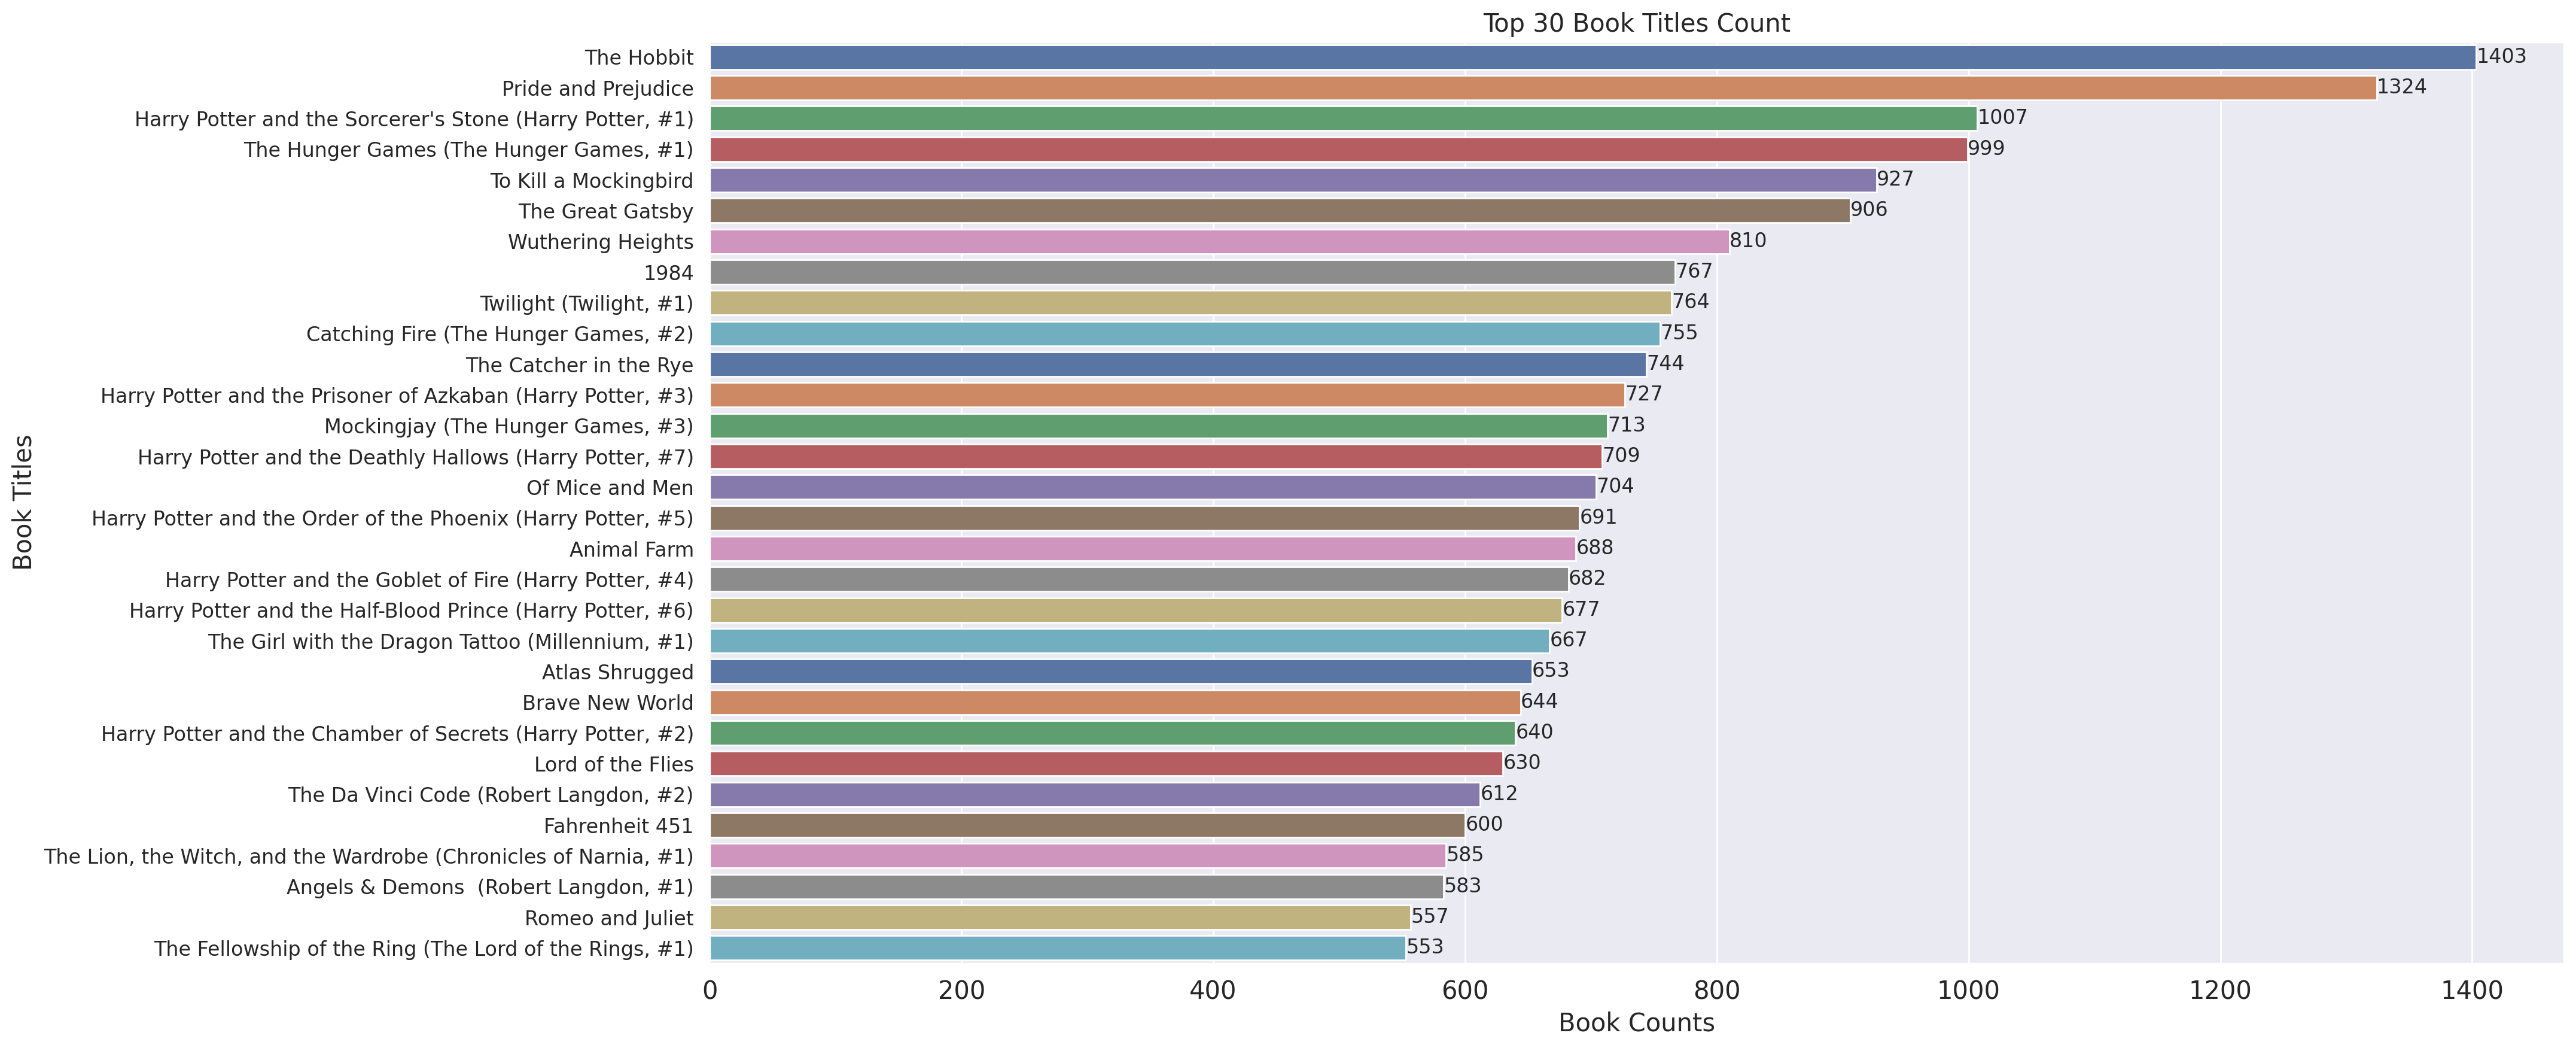

In [ ]:
#Code is obtained https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5

#Used to show top books by count
sns.set(color_codes=True)
plt.figure(figsize=(20, 10), dpi=200)
Top_30_titles = unified_subset_data['title'].value_counts()[:30]
ax = sns.barplot(x=Top_30_titles.values, y=Top_30_titles.index, palette="deep")

# Use to annotating the bars with counts
for i, count in enumerate(Top_30_titles.values):
    ax.text(count + 0.1, i, str(count), va='center', fontsize=12)

# Used to set the labels and title
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel("Book Titles", fontsize=15)
plt.xlabel("Book Counts", fontsize=15)
plt.title("Top 30 Book Titles Count", fontsize=15)

# Show the plot
plt.show()



Here we observe the top 30 most counted books. "The Hobbit" is counted 33,057 times, followed by "Pride and Prejudice", "The Hunger Games (The Hunger Games, #1)", and so on.

## Data Preprocessing

In [ ]:
#Used to count the values of each ratings
unified_subset_data['rating'].value_counts()

rating
5.0    151188
4.0    116728
3.0     69752
0.0     22954
2.0     21035
1.0     12132
3.5      2271
4.5      2161
2.5      1564
1.5       176
0.5        39
Name: count, dtype: int64

Here we see that there are 3,490,107 ratings of 5 stars, 2,716,340 ratings of 4 stars, 1,613,427 ratings of 3 stars, and so on. We also observe that ratings range from 0 to 5. Now let's visualize these using a histogram for clearer understanding. Since we want to normalize the rating values for faster convergence in the training phase of our model, let's use a histogram to gain more insight into the distribution of the ratings. This will allow us to decide which type of normalization, whether z-score or min-max normalization, to use.

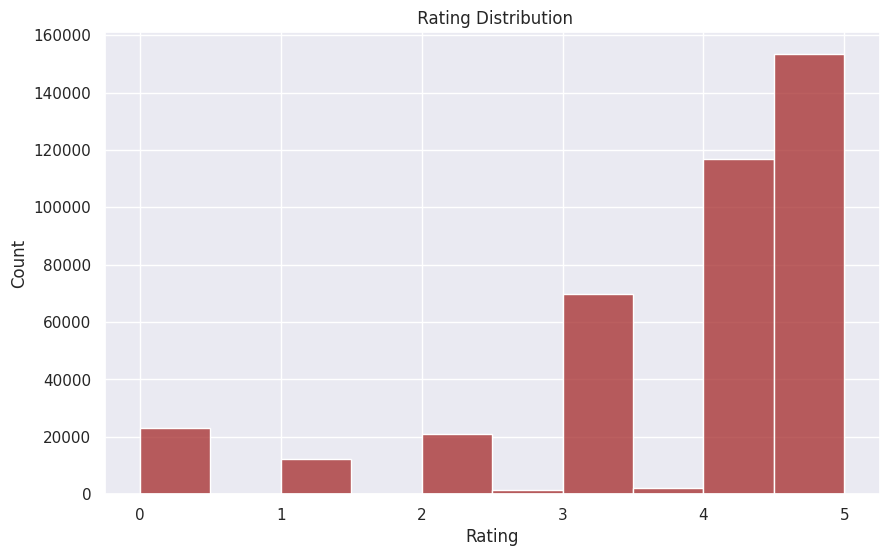

In [ ]:
#Used to show the scaling range of rating
plt.figure(figsize=(10, 6))
sns.histplot(unified_subset_data['rating'], bins=10, color='brown')
plt.title(' Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Here we observed that the above histogram shows a left-skewed or negative skew, which is an indication that the rating distribution is not normal. Since the graph shows that the rating does not exhibit a normal distribution, we will use min-max scaling, as it is suitable for data that do not exhibit normal distribution.

Let's normalize the  rating column




In [ ]:
# Used to define the minimum rating values
min_rating = unified_subset_data['rating'].min()

#Used to define the maximum rating values
max_rating = unified_subset_data['rating'].max()

# Normalize the 'rating' column to a range between 0 and 1
unified_subset_data['rating'] = unified_subset_data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))


Let's check if the transformation is performed.

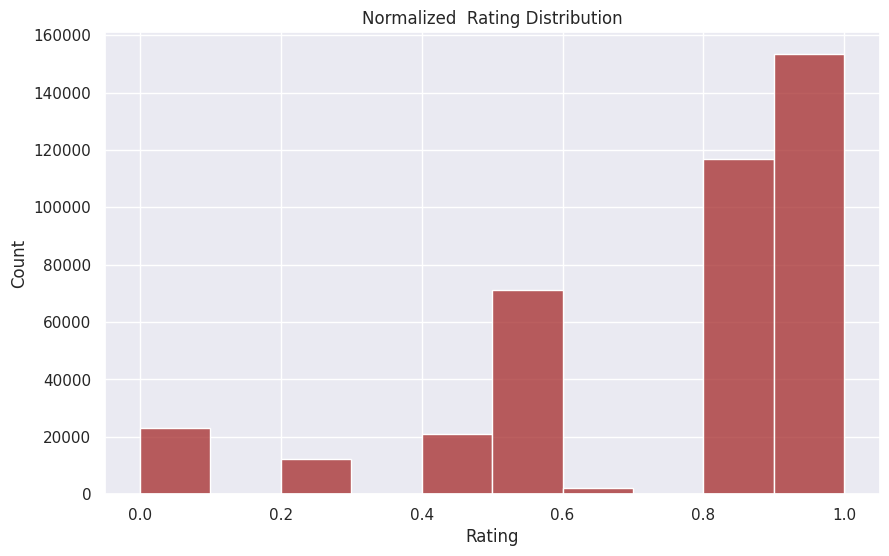

In [ ]:
#Used to show the scaling range of rating
plt.figure(figsize=(10, 6))
sns.histplot(unified_subset_data['rating'], bins=10, color='brown')
plt.title('Normalized  Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Here, we observed that the transformation is complete, as the ratings range from 0 to 1.


Since our columns "user_id" and "book_id" are of object datatype, we will transform them into numerical form  using labelEncoder for our neural network machine learning.

In [ ]:
# Used to create LabelEncoder instance
label_encoder= LabelEncoder()

# Used to encode user_id column
unified_subset_data['user_id'] = label_encoder.fit_transform(unified_subset_data['user_id'])

# Used to encode the book_id column
unified_subset_data['book_id']= label_encoder.fit_transform(unified_subset_data['book_id'])


Let's check if the encoding is peformed for both columns

In [ ]:
# Used to check the unique values of user indices
unified_subset_data['user_id'].unique()


array([118683,  60905,   2079, ..., 102855,   7437,  88560])

In [ ]:
# Used to check the unique values of book indices
unified_subset_data['book_id'].unique()


array([46567, 41121, 57861, ..., 16014,  7482,  5100])

We observed that the book_id column and user_id column are encoded. Now let's develope our model.   

## Models Development


In the model development step, the plan is to develop three  models and choose the one that produces a lower Mean Absolute Error (MAE). The reason for choosing MAE instead of other metrics such as mean squared error (MSE) is that our rating distribution is not normal, and we are interested in developing a model that predicts books for the users that are very close to the books they rated high. In our earlier analysis, we found that there are more 5 and 4 ratings followed by 3 than 0, 1, and 2 in our data, showing a non-normal distribution in our rating data. MAE measures the prediction accuracy robust to non-normally distributed data better than MSE or root mean square error. In addition to MAE, we compared training loss (MAE loss) and validation loss of the models. Once the models are evaluated, the one that performs better and has the lowest MAE will be selected to predict book ratings for unread books and suggest those with the highest predicted ratings to users.

The aim is to create three models with different complexity, starting from the simplest(simple neural network)  and increasing the complexity(deep neural network)  as we progress. Each model will be evaluated, and the model that produces the lowest MAE value will be selected for our recommender system.

In all the models, an embedding size of randomly selected 10 is used, taking computational load into account. In these neural networks, user_id and book_id serve as inputs. To establish our models, inputs are defined with shape 1 to specify each input as one dimension. Next, embedding layers are utilized to convert book_id and user_id into dense vectors of a specified embedding size of 10. Subsequently, these dense vectors are flattened for computational ease into a single vector to execute a dot product. Following the dot product, the results are inputted into different layers of neural networks depending on their complexity (model, model_two, or model_three) to capture more complex relationships between user_id and book_id and predict ratings. The Rectified Linear Unit (ReLU) activation function is selected in the input and hidden layers of our networks due to its simplicity for computational load and compatibility with our ratings, which do not encompass negative scales. Additionally, since we are predicting a continuous variable, ratings, the sigmoid activation function is chosen for all networks in our output layer. The reason is that since our rating data is normalized and we want the rate prediction to be between 0-1, we are using sigmoid even though this activation is more suitable for binary classification. When ReLU was used, our prediction went above 1, so for this reason, sigmoid is used to contain the prediction within the ranges. Adaptive Moment Estimation (Adam) is used in our recommendation system to allow for faster, efficient training, and faster convergence.

During the training phase of the model below, a batch size of 64 is chosen for faster training speed compared to lower batch sizes such as 16 or 32. 64 is selected since it reduces computational load compared to 128 and higher. The number of epochs is set to 10 to monitor and evaluate both underfitting and overfitting of the model. A verbosity level of 1 is chosen to enable observation of the model's progress.

Following the provided explanation, three models will be developed. The objective is to begin with a simpler model, consisting of fewer layers, and gradually increase the complexity as we progress. This approach allows for systematic exploration and evaluation of each model.

### Model 1 Development

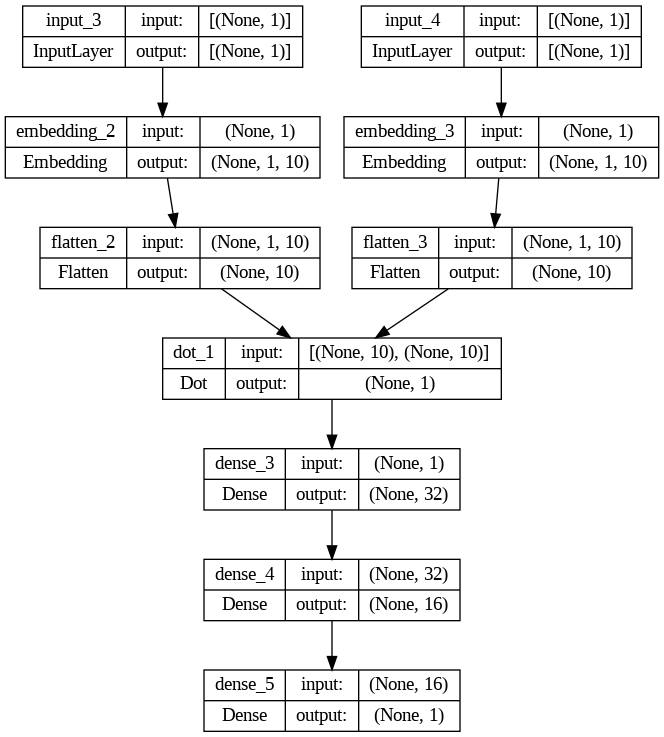

In [ ]:
# Orginal code source https://keras.io/examples/structured_data/collaborative_filtering_movielens/ and https://www.youtube.com/watch?v=lXcO3y_YGOM&ab_channel=Simplilearn

# Used to set the user_id and book_id to one-dimensional input
book_input = Input(shape=(1,))
users_input = Input(shape=(1,))

# Used to set embedding sizes
embedding_size = 10

# Used to allow the neural network to  learn insights from book_id and user_id
book_embedding = Embedding(input_dim=len(unified_subset_data['book_id']), output_dim=embedding_size)(book_input)
user_embedding = Embedding(input_dim=len(unified_subset_data['user_id']), output_dim=embedding_size)(users_input)

# Used to flatten the learned insights of the book and user embedding to one-dimension vectors making it easy to compute the dot product
book_embedding = Flatten()(book_embedding)
user_embedding = Flatten()(user_embedding)

# Used to compute the dot product of the user and book embeddings
dot_product = Dot(axes=1)([book_embedding, user_embedding])

#Used to create dense layers
dense1 = Dense(32, activation='relu')(dot_product)#input layer made up of 32 neurons
dense2 = Dense(16, activation='relu')(dense1)#hidden layer made up of 16 neurons
predicted_ratings = Dense(1, activation=sigmoid)(dense2)#output layer made up of single neuron

# Used to create the model
colab_recommender_model = Model(inputs=[users_input, book_input], outputs=predicted_ratings)

# Used to compile the model
colab_recommender_model.compile(optimizer='adam', loss='mean_absolute_error')

#Used to show the model architecture
plot_model(colab_recommender_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Now that the model is created and compiled, let's use the random seed for NumPy and TensorFlow to ensure reproducibility.

In [ ]:
# Used to set set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)



Now we set the reproducibility of the result we can split the data into training and testing data



In [ ]:
# Used Split the data into training and testing sets
x_train_user_ids, x_test_user_ids, x_train_book_ids, x_test_book_ids, y_train_rating, y_test_rating = train_test_split(
    unified_subset_data['user_id'],
    unified_subset_data['book_id'],
    unified_subset_data['rating'],
    test_size=0.2,
    random_state=42
)



With the data divided into training (80%) and testing (20%) sets, we'll now train the model. Within the training set, we'll further split 20% for validation to monitor the model's performance during training.

In [ ]:
#Used to train the model with validation split
history= colab_recommender_model.fit(
    x=[x_train_user_ids, x_train_book_ids],
    y=y_train_rating,
    validation_split=0.2,
    batch_size=64,
    epochs=11,
    verbose=1)


Epoch 1/11
4000/4000 [==============================] - 134s 33ms/step - loss: 0.2004 - val_loss: 0.1974
Epoch 2/11
4000/4000 [==============================] - 129s 32ms/step - loss: 0.1985 - val_loss: 0.1975
Epoch 3/11
4000/4000 [==============================] - 128s 32ms/step - loss: 0.1927 - val_loss: 0.2148
Epoch 4/11
4000/4000 [==============================] - 122s 30ms/step - loss: 0.1149 - val_loss: 0.2230
Epoch 5/11
4000/4000 [==============================] - 116s 29ms/step - loss: 0.0763 - val_loss: 0.2196
Epoch 6/11
4000/4000 [==============================] - 115s 29ms/step - loss: 0.0600 - val_loss: 0.2218
Epoch 7/11
4000/4000 [==============================] - 118s 29ms/step - loss: 0.0515 - val_loss: 0.2217
Epoch 8/11
4000/4000 [==============================] - 117s 29ms/step - loss: 0.0469 - val_loss: 0.2199
Epoch 9/11
4000/4000 [==============================] - 116s 29ms/step - loss: 0.0433 - val_loss: 0.2194
Epoch 10/11
4000/4000 [==============================] 

In [ ]:
# Used to evaluate the model on the test data
mae_model =colab_recommender_model.evaluate(x=[x_test_user_ids, x_test_book_ids],y=y_test_rating,
  verbose=0)

#Used to print the MAE for the model
print("The MAE for Model one is :", mae_model)

The MAE for Model one is : 0.2228861302137375


### Model 1 Findings

Based on the training phase We noticed that the training loss, also known as the mean absolute error, decreased from 0.2004 to 0.0368 as the epochs progressed. This decrease indicates that the model is effectively learning from the training data. However, the validation loss fluctuated during training, suggesting potential issues with hyperparameter tuning, such as adjusting the model architecture. Since the validation loss increased while the training loss decreased, it indicates overfitting.

To tackle this issue, we will modify the model architecture and apply regularization techniques. Regularization helps prevent overfitting by adding penalties to the model's parameters. By doing so, we aim to improve the model's generalization performance on unseen data.

The current mean absolute error (MAE) of the model is 0.2228861302137375.  After adjusting the model architecture and applying regularization, we will evaluate whether the model's performance improves or not.

### Developing Model 2

We will use a similar architecture to develop the second model by only adjusting the number of neurons in the hidden layer to 8 and  chose a regulization adjustment to produce better model and evaluate the model.

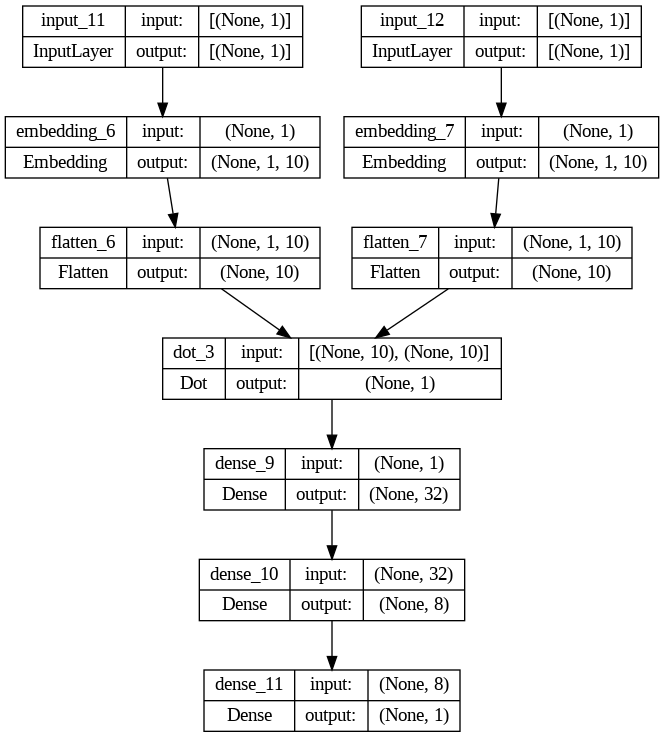

In [ ]:
#code source same as model 1 but modified for our need

# Define input layers for user and book IDs
book_input = Input(shape=(1,))
users_input = Input(shape=(1,))

# Set embedding size
embedding_size = 10

# Create embeddings for user and book IDs
book_embedding = Embedding(input_dim=len(unified_subset_data['book_id']), output_dim=embedding_size, embeddings_regularizer=keras.regularizers.l2(1e-10))(book_input)
user_embedding = Embedding(input_dim=len(unified_subset_data['user_id']), output_dim=embedding_size, embeddings_regularizer=keras.regularizers.l2(1e-10))(users_input)

# Flatten embeddings
book_embedding = Flatten()(book_embedding)
user_embedding = Flatten()(user_embedding)

# Compute dot product of user and book embeddings
dot_product = Dot(axes=1)([book_embedding, user_embedding])

# Create dense layers
dense1 = Dense(32, activation='relu')(dot_product)
dense2 = Dense(8, activation='relu')(dense1)
predicted_ratings = Dense(1, activation='sigmoid')(dense2)

# Create the model
colab_recommender_model_two = Model(inputs=[users_input, book_input], outputs=predicted_ratings)

# Compile the model
colab_recommender_model_two.compile(optimizer='adam', loss='mean_absolute_error')

# Plot the model architecture
plot_model(colab_recommender_model_two, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
#Used to train the model with validation split
history_2= colab_recommender_model_two.fit(
    x=[x_train_user_ids, x_train_book_ids],
    y=y_train_rating,
    validation_split=0.2, # set
    batch_size=64,
    epochs=11,
    verbose=1)


Epoch 1/11
4000/4000 [==============================] - 105s 26ms/step - loss: 0.2008 - val_loss: 0.1972
Epoch 2/11
4000/4000 [==============================] - 104s 26ms/step - loss: 0.1985 - val_loss: 0.1974
Epoch 3/11
4000/4000 [==============================] - 105s 26ms/step - loss: 0.1728 - val_loss: 0.2277
Epoch 4/11
4000/4000 [==============================] - 106s 26ms/step - loss: 0.0999 - val_loss: 0.2188
Epoch 5/11
4000/4000 [==============================] - 106s 27ms/step - loss: 0.0653 - val_loss: 0.2156
Epoch 6/11
4000/4000 [==============================] - 106s 26ms/step - loss: 0.0454 - val_loss: 0.2146
Epoch 7/11
4000/4000 [==============================] - 105s 26ms/step - loss: 0.0387 - val_loss: 0.2138
Epoch 8/11
4000/4000 [==============================] - 105s 26ms/step - loss: 0.0366 - val_loss: 0.2128
Epoch 9/11
4000/4000 [==============================] - 104s 26ms/step - loss: 0.0361 - val_loss: 0.2147
Epoch 10/11
4000/4000 [==============================] 

In [ ]:
# Used to evaluate the model on the test data
mae_model_two =colab_recommender_model_two.evaluate(
    x=[x_test_user_ids, x_test_book_ids],
    y=y_test_rating,
    verbose=0)

# Used to print out MAE for model 2
print("The MAE for model two is :", mae_model_two)

The MAE for model two is : 0.21523134410381317


### Model 2 Findings
The decrease in training loss or Mean Absolute Error (MAE) over the epochs indicates that the model is learning. The validation loss of the model initially started low, then increased for two epochs before decreasing, suggesting that the model is generalizing well. The decrease in both validation and training loss indicates that the model is not overfitting, unlike our Model 1. The MAE of the model is 0.21523134410381317, which is lower than that of Model 1. Thus far, Model 2 demonstrates the best neural architecture for our purposes, as it yields a lower MAE.

Let's now develop a more complex architecture and evaluate it. Our goal is to create a recommendation model with lower training loss and greater stability

### Developing Model 3

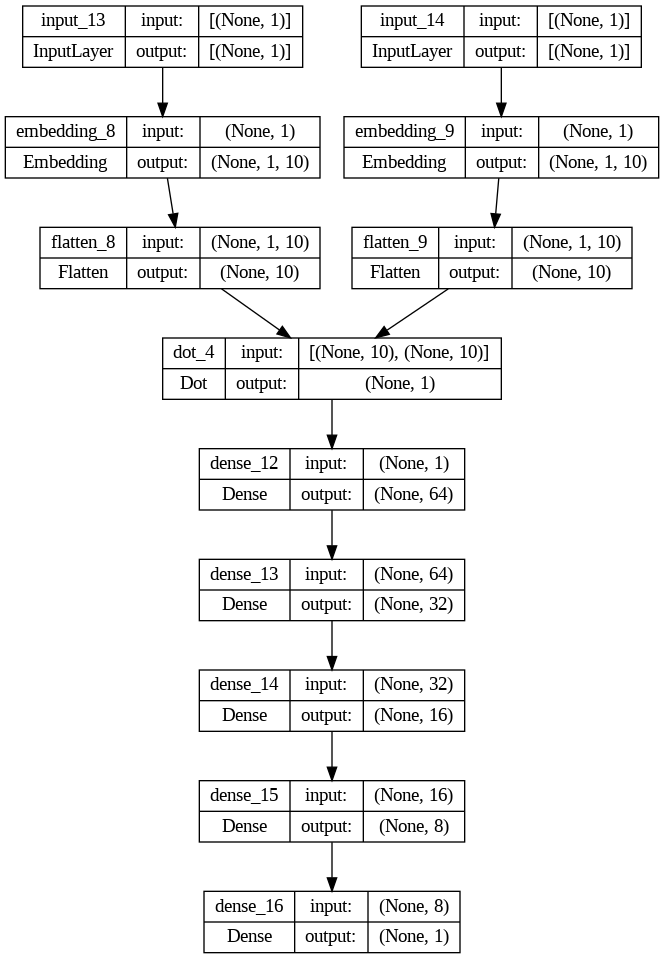

In [ ]:
# Used to set the user_id and book_id to one-dimensional input
book_input = Input(shape=(1,))
users_input = Input(shape=(1,))

# Used to set embedding sizes
embedding_size = 10

# Create embeddings for user and book IDs
book_embedding = Embedding(input_dim=len(unified_subset_data['book_id']), output_dim=embedding_size, embeddings_regularizer=keras.regularizers.l2(1e-10))(book_input)
user_embedding = Embedding(input_dim=len(unified_subset_data['user_id']), output_dim=embedding_size, embeddings_regularizer=keras.regularizers.l2(1e-10))(users_input)


# Used to flatten the learned insights of the book and user embedding to one-dimension vectors making it easy to compute the dot product
book_embedding = Flatten()(book_embedding)
user_embedding = Flatten()(user_embedding)

# Used to compute the dot product of the user and book embeddings
dot_product = Dot(axes=1)([book_embedding, user_embedding])

#Used to create dense layers
dense1 = Dense(64, activation='relu')(dot_product)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
dense4 = Dense(8, activation='relu')(dense3)
predicted_ratings = Dense(1, activation=sigmoid)(dense4)

# Used to create the model
colab_recommender_model_three = Model(inputs=[users_input, book_input], outputs=predicted_ratings)

# Used to compile the model
colab_recommender_model_three.compile(optimizer='adam', loss='mean_absolute_error')

#Used to show the model architecture
plot_model(colab_recommender_model_three, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Train the model with validation split
history_3= colab_recommender_model_three.fit(
    x=[x_train_user_ids, x_train_book_ids],
    y=y_train_rating,
    validation_split=0.2,
    batch_size=64,
    epochs=11,
    verbose=1)

Epoch 1/11
4000/4000 [==============================] - 109s 27ms/step - loss: 0.1999 - val_loss: 0.1972
Epoch 2/11
4000/4000 [==============================] - 112s 28ms/step - loss: 0.1987 - val_loss: 0.1973
Epoch 3/11
4000/4000 [==============================] - 111s 28ms/step - loss: 0.1784 - val_loss: 0.2226
Epoch 4/11
4000/4000 [==============================] - 112s 28ms/step - loss: 0.1226 - val_loss: 0.2237
Epoch 5/11
4000/4000 [==============================] - 112s 28ms/step - loss: 0.0927 - val_loss: 0.2141
Epoch 6/11
4000/4000 [==============================] - 112s 28ms/step - loss: 0.0636 - val_loss: 0.2153
Epoch 7/11
4000/4000 [==============================] - 107s 27ms/step - loss: 0.0536 - val_loss: 0.2140
Epoch 8/11
4000/4000 [==============================] - 107s 27ms/step - loss: 0.0506 - val_loss: 0.2140
Epoch 9/11
4000/4000 [==============================] - 106s 27ms/step - loss: 0.0490 - val_loss: 0.2161
Epoch 10/11
4000/4000 [==============================] 

In [ ]:
# Evaluate the model on the test data
mae_model_three =colab_recommender_model_three.evaluate(
    x=[x_test_user_ids, x_test_book_ids],
    y=y_test_rating,
    verbose=0
)
print("The MAE for model three is :", mae_model_three)

The MAE for model three is : 0.21600528061389923


### Model 3 Findings
Model 3 is more complex than the other two models. The third model shows that the training loss decreases over the epochs, indicating that the model is learning. However, the validation loss for the model fluctuates, which is an indication that the model needs more hyperparameter tuning. The MAE value for the model is The MAE for model three is : 0.21600528061389923, which is higher than Model 2 but lower than Model 1.

In [ ]:
print("MAE for Model 1:", mae_model)
print("MAE for Model 2:", mae_model_two)
print("MAE for Model 3:", mae_model_three)


MAE for Model 1: 0.2228861302137375
MAE for Model 2: 0.21523134410381317
MAE for Model 3: 0.21600528061389923


Since Model 2 has the lowest MAE value and demonstrates better learning and generalization, we will choose it for generating recommendations for users.

let's do that

## Generate Recommendations
let's retrieve the top rows of user IDs from the dataset, then use one of the user IDs to demonstrate the recommendations.

Inorder to generate recommendations first lets create a variable that contain the book ides in the dataset the books.

In [ ]:
# Used to create variable containing all book IDs
all_book_ids = np.arange(len(unified_subset_data['book_id']))
all_book_ids

array([     0,      1,      2, ..., 399997, 399998, 399999])

Now that a variable containing the array of books is created, let's retrieve some user IDs and pick one to generate recommendations for this specific user.

In [ ]:
#Used to get the top 5 rows of user ids
unified_subset_data['user_id'].head()

7642121    118683
2715857     60905
770240       2079
3709582     49317
5674988      4559
Name: user_id, dtype: int64

Let's select the book ID 118683 and generate recommendations for this user.
inorder to do that let's  create an array that contain all books that are associated with this specific user

In [ ]:
# Used to prepare input data for User
user_input = np.full((len(unified_subset_data['book_id']),), 118683)
user_input


array([118683, 118683, 118683, ..., 118683, 118683, 118683])

Now we have the input let's predict the rating for the specified user in our case it is user ID 118683

In [ ]:
# Used to predict ratings for specified user
predicted_ratings = colab_recommender_model_two.predict([user_input, all_book_ids])
predicted_ratings

12500/12500 [==============================] - 13s 1ms/step


array([[0.7996173 ],
       [0.7996205 ],
       [0.79959536],
       ...,
       [0.7996114 ],
       [0.79962283],
       [0.7996283 ]], dtype=float32)

Now we have the predictid rating for the specified user  let's combine the book id to predictid rating so we know which book has which ratings.

In [ ]:
# Used to combine book IDs with predicted ratings
book_ratings = list(zip(all_book_ids, predicted_ratings.flatten()))
book_ratings[-5:]

[(399995, 0.7996403),
 (399996, 0.7996116),
 (399997, 0.7996114),
 (399998, 0.79962283),
 (399999, 0.7996283)]

Here we see that the the book is combined with the predicted ratings now let's arrange the books in descending order and select the top-rated books for the user.

In [ ]:
# Used to sort book_ratings in descending order based on predicted ratings
book_ratings.sort(key=lambda x: x[1], reverse=True)

# Used to select top 5 recommended books
top_5_recommendations = book_ratings[:5]
top_5_recommendations

[(14, 1.0), (32, 1.0), (81, 1.0), (161, 1.0), (174, 1.0)]

Here we see that book id 14,32,81,161 and 174 are the top 5 predicted rates for the user  now we can map the book IDs to book titles for the user to read the titles of the books.

In [ ]:
# Used to print  top five recommended books and thier titles
book_id_to_title = {book_id: title for book_id, title in zip(unified_subset_data['book_id'], unified_subset_data['title'])}

for book_id, rating in top_5_recommendations:
    book_title = book_id_to_title.get(book_id, 'Unknown Title')
    print(f"Book ID: {book_id}, Book Title: {book_title}, Predicted Rating: {rating}")


Book ID: 14, Book Title: Audacity to believe, Predicted Rating: 1.0
Book ID: 32, Book Title: Candles: Elements of the Table, Predicted Rating: 1.0
Book ID: 81, Book Title: City of Djinns, Predicted Rating: 1.0
Book ID: 161, Book Title: Little Wolf's Big Book of Badness and Daring Deeds, Predicted Rating: 1.0
Book ID: 174, Book Title: For Matrimonial Purposes, Predicted Rating: 1.0


Upon analysis, we find that for user 118683, our top 5 recommendations are as follows: 'Audacity to Believe,' 'Candles: Elements of the Table,' 'City of Djinns,' 'Little Wolf's Big Book of Badness and Daring Deeds,' and 'For Matrimonial Purposes.' These titles represent the top recommendations tailored specifically for this user.

## Conclusions

The project aimed to develop a neural network-based recommendation system for books, inspired by similar systems used by platforms like Netflix and Amazon. By learning user-book relationships, the model predicts book ratings. It utilizes entry points for users and books, learning their characteristics through an embedding layer. The model identifies similarities between users and books, flattens characteristics for efficiency, and uses dot products for comparison. The selected model successfully recommended books but requires further refinement. Limited computational resources influenced model design. Implementing these neural networks enhances user experience, engagement, revenue, and decision-making. This model also adaptable. With the right data, we can train it to recommend other products. This model's potential extends beyond recommendations books. It can be used to make other types of predictions as well. Overall, this recommendation model has the potential to significantly increase user engagement, motivation, and retention, ultimately leading to higher revenue.


# Referances
Eker,  &Ouml;mer F. (2020, April 8). Exploratory Data Analysis: Imdb dataset. Medium. https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5

Fastai. (n.d.). Fastbook/08_collab.ipynb at master · FASTAI/Fastbook. GitHub. https://github.com/fastai/fastbook/blob/master/08_collab.ipynb

Mejbahahammad. (2020, September 7). Movie Recommender Systems Using Neural Network. Kaggle. https://www.kaggle.com/code/mejbahahammad/movie-recommender-systems-using-neural-network

OpenAI. (2024). ChatGPT (3.5) [Large language model]. https://chat.openai.com(used for correcting spelling and grammer as well as generating codes)

Recommendation Systems and machine learning. Recommendation Systems and Machine Learning. (n.d.-a). https://www.itransition.com/machine-learning/recommendation-systems

Team, K. (n.d.). Keras Documentation: Collaborative filtering for movie recommendations. https://keras.io/examples/structured_data/collaborative_filtering_movielens/

Team, K. (n.d.-b). Keras documentation: Embedding layer. https://keras.io/api/layers/core_layers/embedding/

Team, K. (n.d.-b). Keras documentation: Embedding layer. https://keras.io/api/layers/core_layers/embedding/

